In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
% matplotlib inline


In [2]:
df = pd.read_csv("course_page_actions.csv")
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [3]:
#get only the views
views = df.query('action == "view"')

In [4]:
#Group by id and group with the duration mean.
reading_times = views.groupby(['id','group'])['duration'].mean()

In [5]:
#reset index to keep this as a dataframe
reading_times = reading_times.reset_index()

In [6]:
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [7]:
#get means for control/experiment
control_mean = views.query('group == "control"')['duration'].mean()
experiment_mean = views.query('group == "experiment"')['duration'].mean()
control_mean, experiment_mean

(115.38637100678429, 131.33050155670614)

In [8]:
obs_diff = experiment_mean - control_mean
obs_diff

15.944130549921852

In [9]:
#bootstrap sample
diffs = []
for _ in range(10000):
    b_samp = views.sample(views.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [10]:
diffs = np.array(diffs)

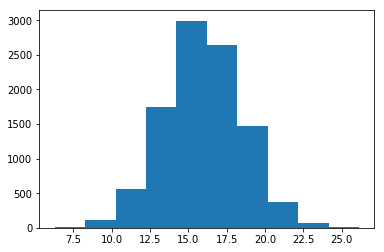

In [11]:
plt.hist(diffs);

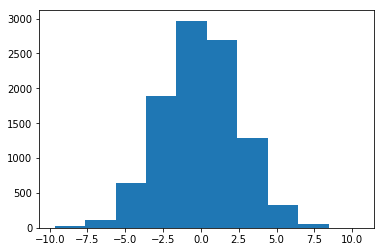

In [12]:
null_vals = np.random.normal(0.,diffs.std(),diffs.size)
plt.hist(null_vals);

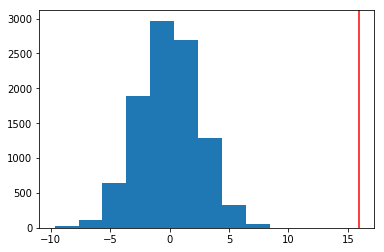

In [13]:
plt.hist(null_vals);
plt.axvline(x=obs_diff,color='red');